In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor, as_completed
import pandas as pd
from scipy import fft


def to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


def load_img_with_features(filepath,label):
    img = cv2.imread(filepath)
    gray_img = to_gray(img)
    features = np.abs(fft.fft2(gray_img)).flatten() # TODO: find out if this is the best way to do it
    return features, label



def load_imgs_from_directory(directory, label, num_images=None):
    images = []
    labels = []
    files = os.listdir(directory)
    if num_images is not None:
        files = files[:num_images]
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(load_img_with_features, os.path.join(directory, filename), label) for filename
                   in files]
        for future in as_completed(futures):
            features, lbl = future.result()
            images.append(features)
            labels.append(lbl)
    return images, labels

base_dir = "/home/dhruv/Programming/CollegeProjects/Sem5/MLProject/train"
fake_dir = os.path.join(base_dir, 'FAKE')
real_dir = os.path.join(base_dir, 'REAL')

num_images_to_load = 10000

fake_images, fake_labels = load_imgs_from_directory(fake_dir, 0, num_images=num_images_to_load)
real_images, real_labels = load_imgs_from_directory(real_dir, 1, num_images=num_images_to_load)

features = np.vstack((fake_images, real_images))
labels = np.concatenate((fake_labels, real_labels))




X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=20   )
knn.fit(X_train, y_train)

accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

training_accuracy = knn.score(X_train, y_train)
print(f"Training Accuracy: {training_accuracy}")
predictions = knn.predict(X_test[:20])  
actual_labels = y_test[:20]

# for i in range(len(predictions)):
#     print(f"Predicted: {predictions[i]}\tActual: {actual_labels[i]}")   

predicted_vs_actual = pd.DataFrame({"Actual": actual_labels, "Predicted": predictions})
predicted_vs_actual



Accuracy: 0.7025
Training Accuracy: 0.739125


,Actual,Predicted
0,1,1
1,0,0
2,0,1
3,0,1
4,1,1
5,1,1
6,1,1
7,0,1
8,1,1
9,0,0


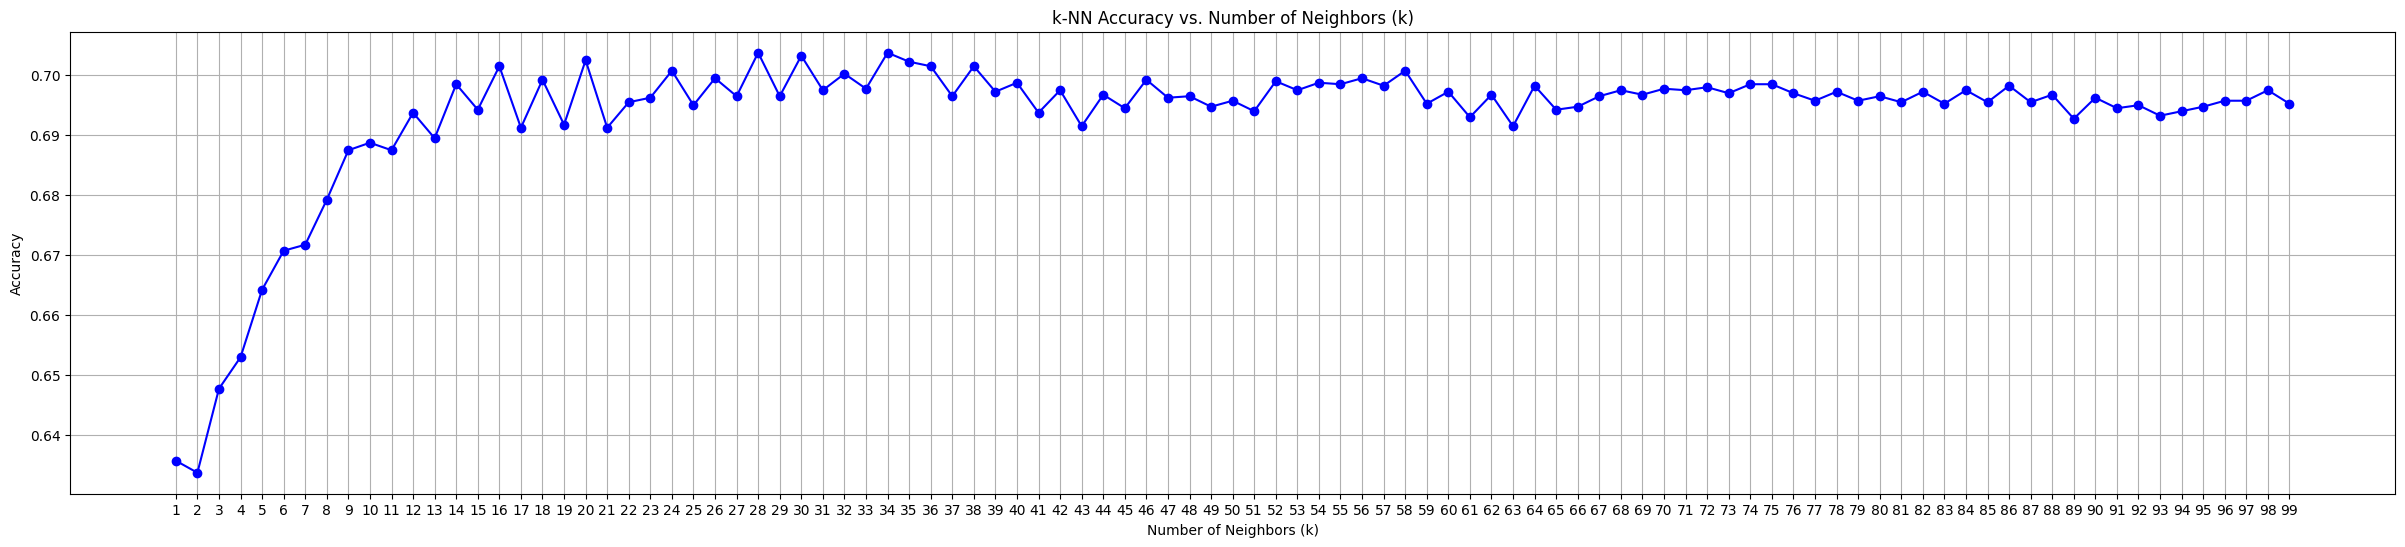

,K-Value,Accuracy
1,1,0.63575
2,2,0.63375
3,3,0.64775
4,4,0.65300
5,5,0.66425
...,...,...
95,95,0.69475
96,96,0.69575
97,97,0.69575
98,98,0.69750


In [6]:
k_values = range(1, 100)
accuracies = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    # print(f"Accuracy for k={k}: {accuracy}")

accuracies_df = pd.DataFrame({"K-Value":k_values,"Accuracy": accuracies},index=k_values)

plt.figure(figsize=(30, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('k-NN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

accuracies_df   

[ 2.23606798  5.          7.81024968 10.63014581 13.45362405 16.2788206 ]
